
# Exploratory Data Analysis of Brazilian National League

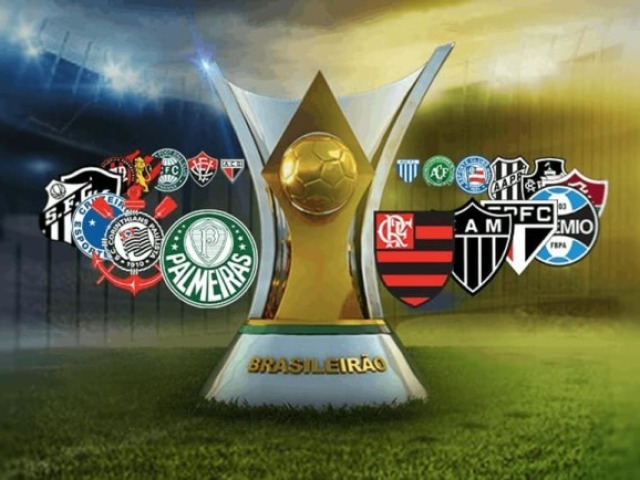

### Data:

The dataset contains soccer league data of Brazil from 2012-21.

### Variables:
| Sl No | Field Name | Description |
|-|-|-|
|1|HomeTeam	|Name of team playing in home ground|
|2	|AwayTeam	|Name of team playing in away ground|
|3	|HG	|Home team goals at the end of match|
|4	|AG	|Away team goals at the end of match|
|5	|Res	|Match results (h:home team win, a:away team win, d:draw)|


### Exploration ideas:
Summary Stat: Matches, Team, %Home Win, Away Win

Best/Worst Performing teams




### Local path and importing packages

In [1]:
local_path="../input/"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [3]:
col = ['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG', 'AG', 'Res']
df = pd.read_csv('../input/brazilsoccerleague/BRA.csv', usecols=col)
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A


In [4]:
df.shape

(3486, 10)

In [5]:
df.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
dtype: int64

### Dropping single row with NULL value

In [15]:
values = {'HG': 0, 'AG': 0, 'Res': 'D'}
df.fillna(value=values, inplace=True)
#df.dropna(axis=0,inplace=True)


In [16]:
df.describe()

,Season,HG,AG
count,3486.000000,3486.000000,3486.000000
mean,2016.096959,1.425990,0.944349
std,2.650856,1.162593,0.972978
min,2012.000000,0.000000,0.000000
25%,2014.000000,1.000000,0.000000
50%,2016.000000,1.000000,1.000000
75%,2018.000000,2.000000,1.000000
max,2021.000000,6.000000,6.000000


### List of teams and match count

In [17]:
from collections import Counter
htmc=Counter(df.Home)
print('Home Team Match:',htmc)

Home Team Match: Counter({'Flamengo RJ': 175, 'Santos': 175, 'Corinthians': 174, 'Atletico-MG': 174, 'Sao Paulo': 174, 'Fluminense': 174, 'Gremio': 174, 'Palmeiras': 156, 'Internacional': 155, 'Botafogo RJ': 152, 'Cruzeiro': 152, 'Bahia': 137, 'Sport Recife': 136, 'Vasco': 133, 'Coritiba': 133, 'Chapecoense-SC': 117, 'Atletico-PR': 114, 'Ponte Preta': 95, 'Vitoria': 95, 'Goias': 95, 'Figueirense': 76, 'Atletico GO': 61, 'Ceara': 61, 'Avai': 57, 'America MG': 42, 'Athletico-PR': 41, 'Fortaleza': 41, 'Portuguesa': 38, 'Nautico': 38, 'Criciuma': 38, 'Bragantino': 22, 'Joinville': 19, 'Santa Cruz': 19, 'Parana': 19, 'CSA': 19, 'Juventude': 4, 'Cuiaba Esporte': 1})


### Match Count of each Team played on Home ground

In [18]:
df.groupby('Home').count()['Res'].sort_values(ascending=False)

Home
Flamengo RJ       175
Santos            175
Corinthians       174
Sao Paulo         174
Atletico-MG       174
Gremio            174
Fluminense        174
Palmeiras         156
Internacional     155
Cruzeiro          152
Botafogo RJ       152
Bahia             137
Sport Recife      136
Coritiba          133
Vasco             133
Chapecoense-SC    117
Atletico-PR       114
Vitoria            95
Goias              95
Ponte Preta        95
Figueirense        76
Ceara              61
Atletico GO        61
Avai               57
America MG         42
Athletico-PR       41
Fortaleza          41
Nautico            38
Portuguesa         38
Criciuma           38
Bragantino         22
Parana             19
Joinville          19
Santa Cruz         19
CSA                19
Juventude           4
Cuiaba Esporte      1
Name: Res, dtype: int64

### List of Matches played by each team on Away ground

In [19]:
df.groupby('Away').count()['Res'].sort_values(ascending=False)

Away
Corinthians       175
Sao Paulo         175
Atletico-MG       175
Fluminense        175
Santos            174
Gremio            173
Flamengo RJ       172
Internacional     156
Palmeiras         155
Cruzeiro          152
Botafogo RJ       152
Sport Recife      137
Bahia             136
Coritiba          133
Vasco             133
Chapecoense-SC    118
Atletico-PR       114
Vitoria            95
Goias              95
Ponte Preta        95
Figueirense        76
Ceara              60
Atletico GO        59
Avai               57
Fortaleza          42
Athletico-PR       41
America MG         41
Nautico            38
Portuguesa         38
Criciuma           38
Bragantino         23
Parana             19
Joinville          19
Santa Cruz         19
CSA                19
Cuiaba              4
Juventude           3
Name: Res, dtype: int64

In [20]:
df['Winner']='NA'
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,Winner
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,NA
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,NA
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,NA
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,NA
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,NA


In [21]:
df['Winner'][df['Res']=='H']=df['Home']
df['Winner'][df['Res']=='A']=df['Away']


In [22]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,Winner
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,NA
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,NA
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,Figueirense
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,Botafogo RJ
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,Fluminense


### What is Win% in Home and Away Ground?

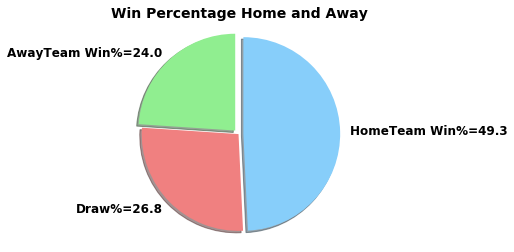

In [23]:
df.head()
x=100*df.groupby('Res').count()['Home']/len(df)
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(x,explode=[.05,0,.05],labels=['AwayTeam Win%='+str(x.iloc[0].round(1)),
                                    'Draw%='+str(x.iloc[1].round(1)),'HomeTeam Win%='+str(x.iloc[2].round(1))],
        startangle=90,shadow=True,colors=colors,textprops={'Fontsize':'large', 'fontweight':'bold'})
plt.axis('equal')
plt.title('Win Percentage Home and Away',fontsize=14,fontweight='bold');

### Which team is best performing? Most Winner to Lowest Winner

### How is the Percentage of Win, Loss,Draw of Team on Home ground?

### How is the percentage of Win, Loss, Draw of teams when played on Away Ground


Text(0.5,1,'Percentage of Win/Loss/Draw at Away Ground')

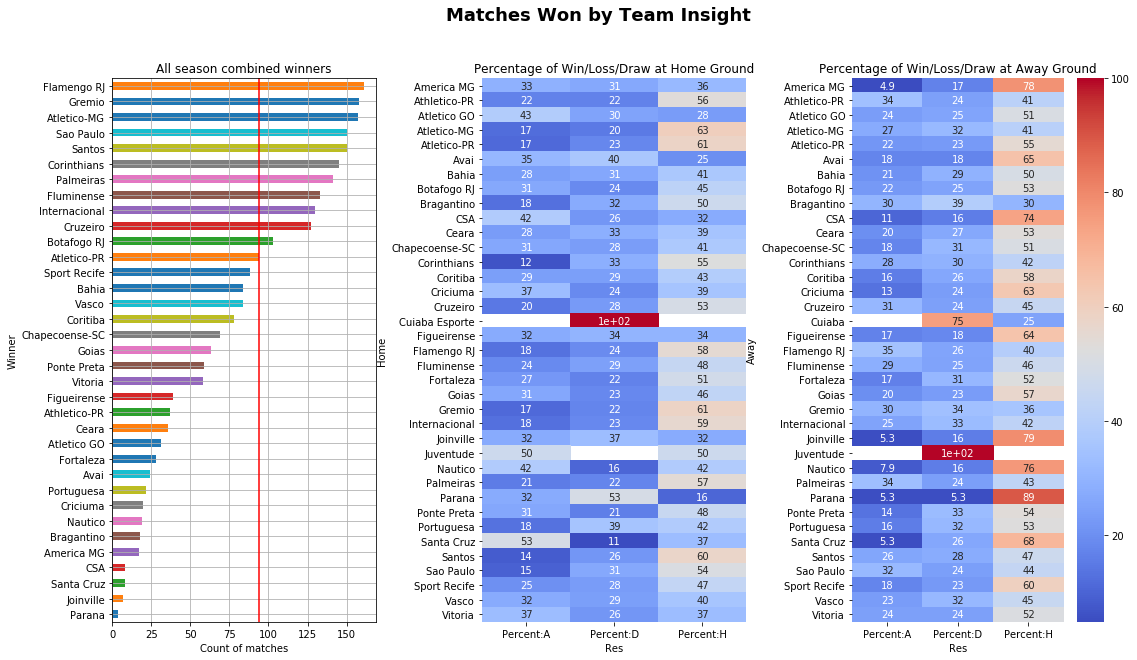

In [24]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.suptitle("Matches Won by Team Insight",fontsize=18,fontweight='bold')
                    
plt.subplot(1,3,1)
df.groupby('Winner').count()['Res'].sort_values(ascending=True).iloc[1:-1].plot(kind='barh',grid=True)
plt.axvline(np.mean(df.groupby('Winner').count()['Res']),color='r')
#df_win.ix[1:-1]
plt.title('All season combined winners')
plt.xlabel('Count of matches')
#plt.tight_layout()

plt.subplot(1,3,2)
df_home_team=df.pivot_table(values='Away',index='Home',columns='Res',aggfunc='count')
Total=df_home_team.sum(axis=1)
for i in df_home_team.columns.tolist():
    df_home_team['Percent:'+i]=100*df_home_team[i]/Total
sns.heatmap(df_home_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True,cbar=False)
plt.title('Percentage of Win/Loss/Draw at Home Ground')
#plt.tight_layout()

plt.subplot(1,3,3)
df_away_team=df.pivot_table(values='Home',index='Away',columns='Res',aggfunc='count')
Total=df_away_team.sum(axis=1)
for i in df_away_team.columns.tolist():
    df_away_team['Percent:'+i]=100*df_away_team[i]/Total
sns.heatmap(df_away_team[['Percent:A','Percent:D','Percent:H']],cmap='coolwarm',annot=True)
plt.title('Percentage of Win/Loss/Draw at Away Ground')
#plt.tight_layout()
                    

### Which team is best performing? Most Winner to Lowest Winner
**Conclusion:**
1) Flamengo, Gremio, Atletico MG, São Paulo e Santos are the best winners

### How is the Percentage of Win, Loss,Draw of Team on Home ground?
**Conclusion:**
1) Atletico MG, Gremio, Santos, Flamengo are the best team on Home Ground respectively in order
2) Santa Cruz and Juventude are lowest performing team on Home Ground,respectively in order, they loose close to 50% of matches
3) Paraná is the team who makes most draws on Home ground

### How is the percentage of Win, Loss, Draw of teams when played on Away Ground
**Conclusion:**
1) Best teams in away ground: Flamengo, Atletico PR, São Paulo, Palmeiras
2) Worst teams in away ground: Paraná, Joinville, America MG, Nautico
3) Most draws made by Cuiaba on away ground

### Goal made by team in Home Ground and Away Ground


In [25]:
pd.set_option('display.max_columns',500)
df_goal=df.pivot_table(values=['HG','AG'],index='Home',columns='Away',aggfunc='sum')
#df_goal

Text(0.5,1,'Total goal at Away Ground')

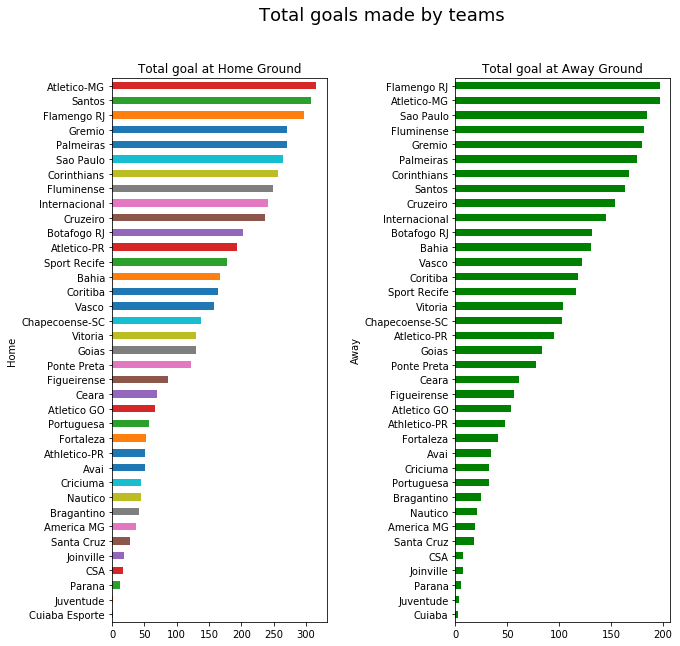

In [26]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace= .6)
plt.suptitle('Total goals made by teams',fontsize=18)
plt.subplot(1,2,1)
df_goal.xs('HG',level=0,axis=1).sum(axis=1).sort_values(ascending=True).plot(kind='barh')
plt.title('Total goal at Home Ground')
plt.subplot(1,2,2)
df_goal.xs('AG',level=0,axis=1).sum(axis=0).sort_values().plot(kind='barh',color='g')
plt.title('Total goal at Away Ground')

### Goal made by team in Home Ground and Away Ground

**Conclusion:**

1) Atletico MG, Santos, Flamengo, Gremio, Palmeiras in Home Ground respectively

2) Flamengo, Atletico MG, São Paulo, Fluminense, Gremio at Away Ground respectively

### Which team score how many goals against which team on both Home and Away Ground 

Text(0.5,1,'Score of Teams at Away Ground')

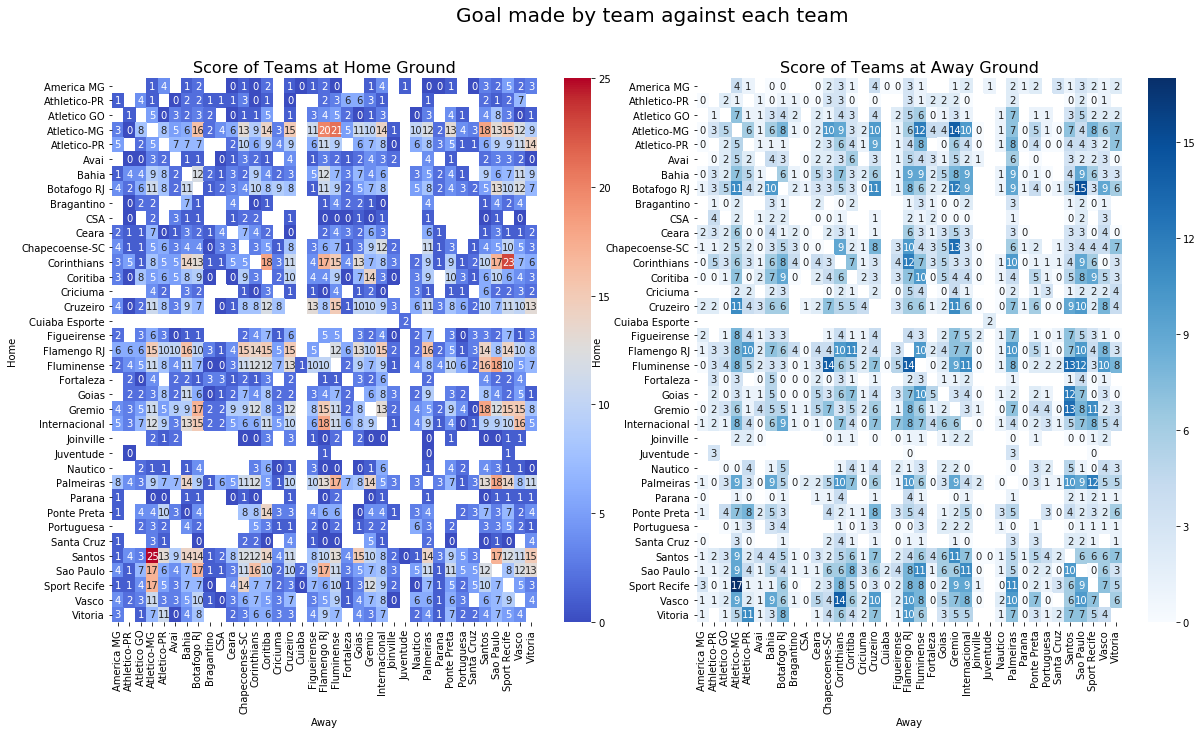

In [27]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.1)
plt.suptitle('Goal made by team against each team',fontsize=20)
plt.subplot(1,2,1)
sns.heatmap(df_goal.xs('HG',level=0,axis=1),cmap='coolwarm',annot=True)
plt.title('Score of Teams at Home Ground', fontsize=16)
#sns.heatmap(df_HGgoal.xs)
plt.subplot(1,2,2)
sns.heatmap(df_goal.xs('AG',level=0,axis=1),cmap='Blues',annot=True)
plt.title('Score of Teams at Away Ground',fontsize=16)

### Is there any correlation between Number of matches won verses goal scored?


Text(0.5,1,'Corelation of Win vs Score')

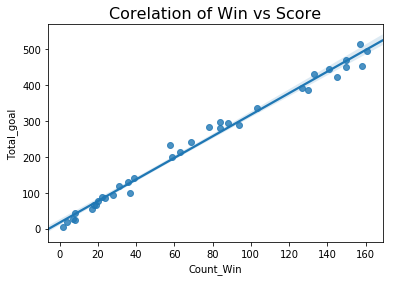

In [28]:
df_win=df.groupby('Winner').count()['Res']
df_total_goals=df_goal.xs('HG',level=0,axis=1).sum(axis=1)+df_goal.xs('AG',level=0,axis=1).sum(axis=0)
df_win_goal=pd.concat({'Count_Win':df_win,'Total_goal':df_total_goals},axis=1, sort=False).dropna()
#plt.scatter(df_win_goal.Count_Win,df_win_goal.Total_goal)
sns.regplot('Count_Win','Total_goal',df_win_goal)
plt.title('Corelation of Win vs Score',fontsize=16)

### Is there any correlation between Number of matches won verses goal scored?
**Conclusion:**
1) There are strong positive correlation between Goals scored and Matches won.